<a href="https://colab.research.google.com/github/maxi9113/colab_notebook/blob/main/IC_Ejercicio_jerarquicio_taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circles

In [ ]:
%pip install scipy

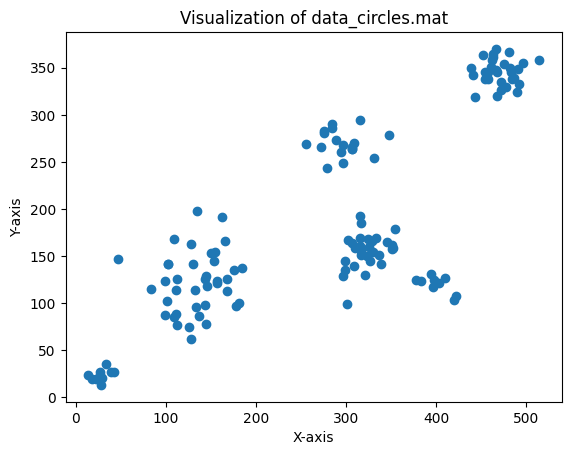

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load the .mat file
mat_data = loadmat('/content/drive/MyDrive/Colab Notebooks/Files/data_clusters.mat')
mat_data = mat_data["X"]
# Extract the data (assuming the data is stored in a variable named 'X' and 'Y' in the .mat file)


# Create a scatter plot
plt.scatter(mat_data[:, 0], mat_data[:, 1])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of data_circles.mat')
plt.show()

[[351 162]
 [181 100]
 [483 345]
 [302 167]
 [422 108]
 [ 29  20]
 [441 342]
 [457 346]
 [128  62]
 [130 141]
 [348 279]
 [ 99 123]
 [ 27  27]
 [ 84 115]
 [112 126]
 [145 129]
 [351 157]
 [294 261]
 [102 142]
 [103 142]
 [144 126]
 [315 161]
 [475 354]
 [279 244]
 [354 179]
 [101 102]
 [168 126]
 [284 286]
 [452 364]
 [466 370]
 [ 18  19]
 [132 114]
 [337 151]
 [410 127]
 [299 135]
 [306 164]
 [323 150]
 [284 290]
 [330 154]
 [339 141]
 [134  96]
 [317 185]
 [ 28  13]
 [146 118]
 [454 346]
 [472 326]
 [128 163]
 [157 121]
 [150 153]
 [462 358]
 [457 338]
 [463 365]
 [333 169]
 [331 254]
 [438 350]
 [109  85]
 [482 350]
 [352 159]
 [321 130]
 [ 47 147]
 [514 358]
 [316 155]
 [296 268]
 [309 139]
 [396 117]
 [166 166]
 [484 338]
 [329 166]
 [403 121]
 [162 191]
 [454 338]
 [398 124]
 [383 123]
 [486 339]
 [481 367]
 [ 14  24]
 [ 34  35]
 [477 330]
 [306 266]
 [168 113]
 [297 129]
 [315 169]
 [394 131]
 [326 145]
 [ 27  24]
 [315 294]
 [377 125]
 [184 137]
 [256 269]
 [ 39  27]
 [144  98]

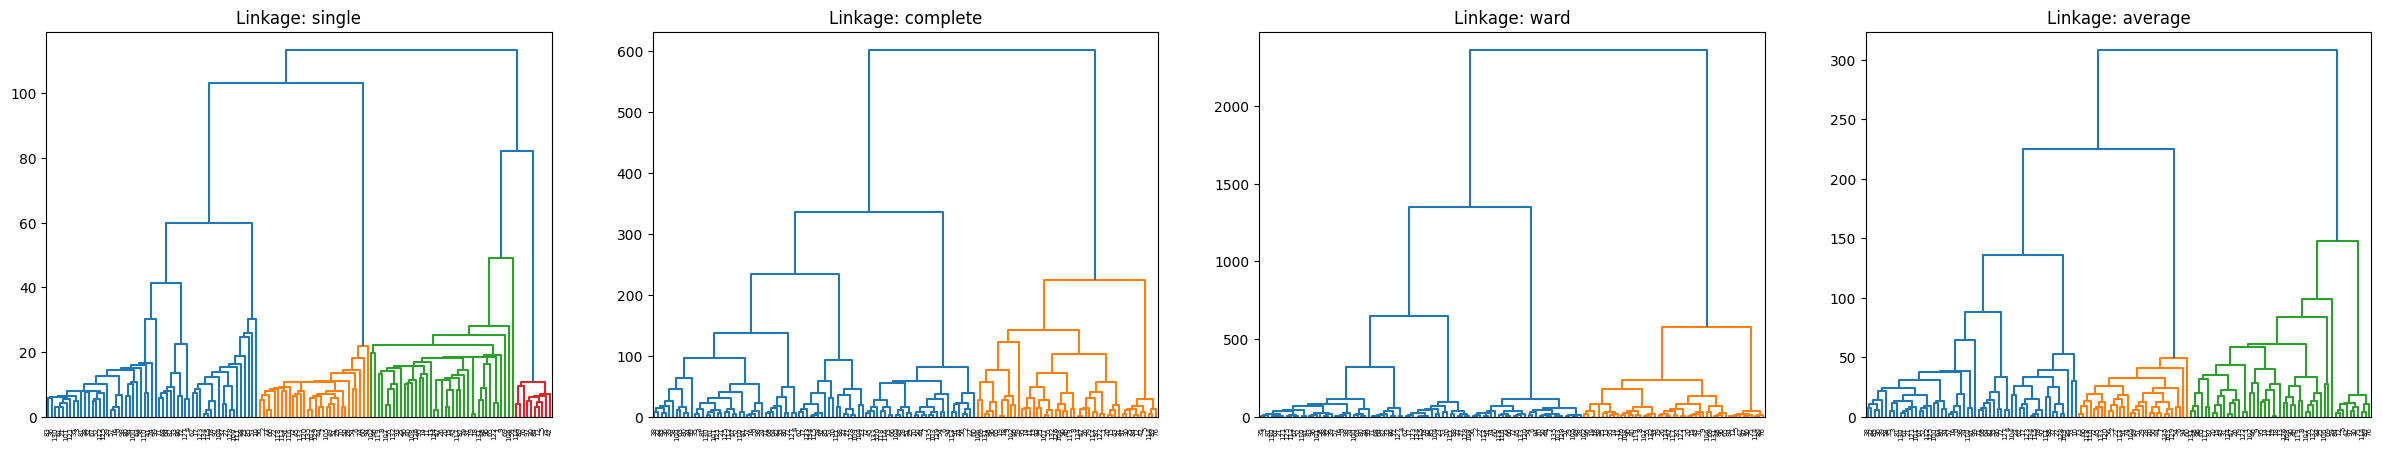

In [159]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Perform hierarchical clustering
# We use 'ward' linkage which minimizes the variance of the clusters being merged.
# Since X and Y are separate arrays, we need to combine them for clustering.
# Assuming X and Y correspond to the two dimensions of the data points.
# data = mat_data['X'] # Assuming X contains the data points
# If your data has more than one dimension stored in separate arrays, you would combine them like this:
data = np.column_stack((mat_data[:, 0], mat_data[:, 1]))
methods = ['single', 'complete', 'ward', 'average']
linked_method = []

fig, axes = plt.subplots(1, 4, figsize=(30, 5))
for i, method in enumerate(methods):
    linked_clusters = linkage(data, method)
    linked_method.append(linked_clusters)
    dendrogram(linked_clusters,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True,
               ax=axes[i])
    axes[i].set_title(f'Linkage: {method}')
plt.show()


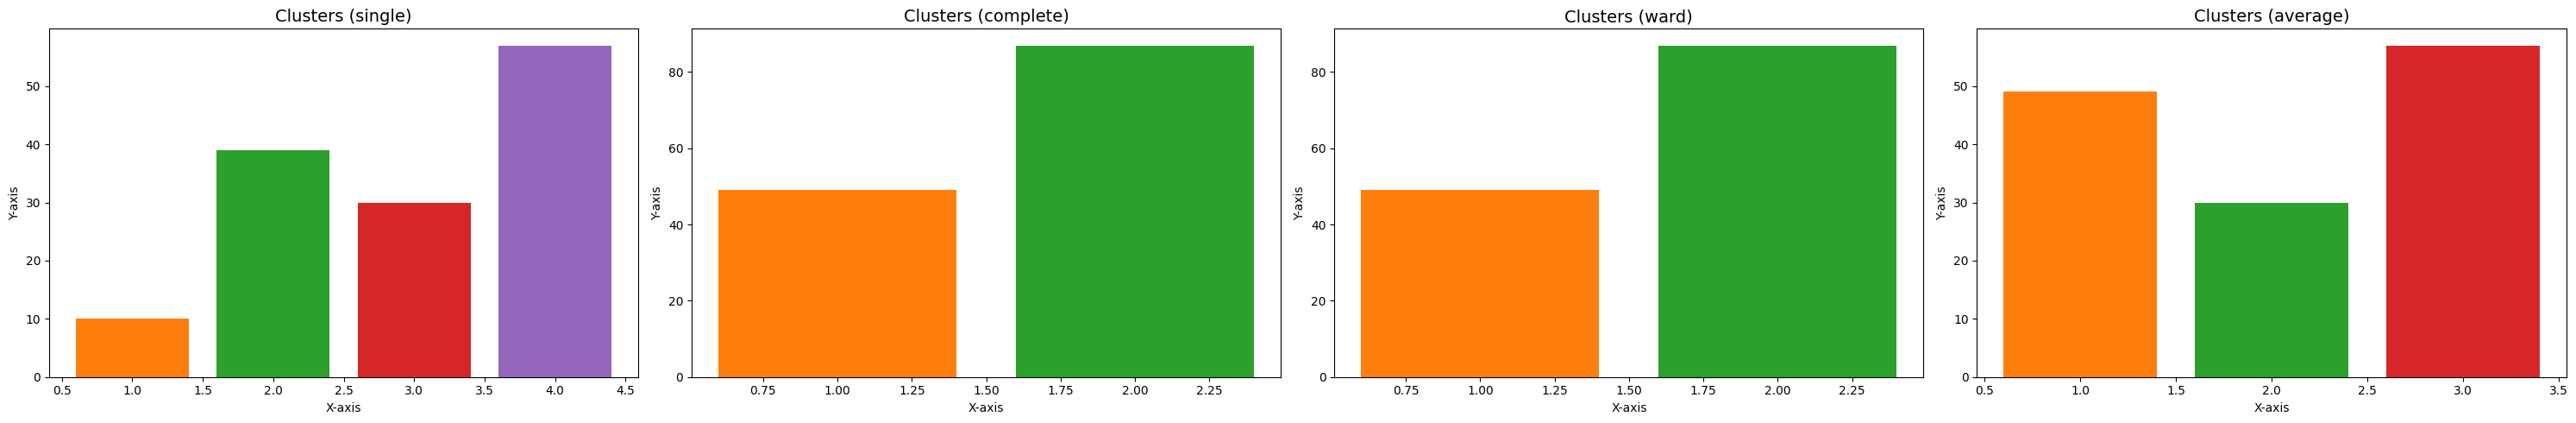

In [ ]:


from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from collections import Counter

# Crear figura con 1 fila y 4 columnas
fig, axes = plt.subplots(1, 4, figsize=(30, 5))

# Número de clusters detectados en cada método
max_d = [4, 2, 2, 3]
methods = ['single', 'complete', 'ward', 'average']

for i, method in enumerate(methods):
    # Obtener clusters con fcluster
    clusters = fcluster(linked_method[i], max_d[i], criterion='maxclust')
    conteo = Counter(clusters)
    colors = plt.cm.tab10.colors

    axes[i].bar(conteo.keys(), conteo.values(),
                color=[colors[c % len(colors)] for c in conteo.keys()])

    # Etiquetas y título
    axes[i].set_title(f'Clusters ({method})', fontsize=14)
    axes[i].set_xlabel('X-axis')
    axes[i].set_ylabel('Y-axis')

plt.tight_layout()
plt.show()


In [134]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/Frogs_MFCCs.csv')
df = df.drop(columns=["RecordID","Species"])


# Define the new class mapping vamos a agrupar Bufonidae=> por ende todas las subgeneros de Bufonidae-pasaran a Dendrobatidae en este caso luego de analisis de datos Rhinella es el unico genero
class_mapping_updated = {
    'Bufonidae': 'Dendrobatidae'
}
# Apply the updated mapping
df['balanced_family'] = df['Family'].map(class_mapping_updated).fillna(df['Family'])
#segundo paso es eliminar 2000 registros de la familia Leptodactylidae 4420 = 2220
a_family_indices = df[df['balanced_family'] == 'Leptodactylidae'].head(2000).index
df = df.drop(columns=["Family"])
merged_df_normalize = df.drop(a_family_indices)
display(df.head())

# Display the count of each new class in the reduced DataFrame
print("Distribution of Updated Familias ")
display(merged_df_normalize['balanced_family'].value_counts())
display(merged_df_normalize.head())

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Genus,balanced_family
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Adenomera,Leptodactylidae
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Adenomera,Leptodactylidae
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Adenomera,Leptodactylidae
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Adenomera,Leptodactylidae
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Adenomera,Leptodactylidae


Distribution of Updated Familias 


,count
balanced_family,
Leptodactylidae,2420
Hylidae,2165
Dendrobatidae,610


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Genus,balanced_family
672,1.0,0.192996,-0.103848,0.216192,0.120804,0.109504,0.154796,0.013647,-0.116241,0.067082,...,-0.214675,-0.230585,0.033429,0.214953,0.079759,-0.042802,0.044967,0.023167,Ameerega,Dendrobatidae
673,1.0,0.265533,-0.112521,0.124217,0.149678,0.171732,0.104145,-0.134588,-0.220677,0.047092,...,-0.165175,-0.111237,0.144494,0.177566,-0.088033,-0.119785,0.044567,0.026724,Ameerega,Dendrobatidae
674,1.0,0.310865,0.005342,0.241530,0.207491,0.236536,0.194143,-0.088969,-0.227693,0.064032,...,-0.183258,-0.197144,0.074107,0.193985,-0.020983,-0.086163,0.034122,-0.006974,Ameerega,Dendrobatidae
675,1.0,0.233606,-0.144457,0.160421,0.173649,0.281706,0.231076,-0.088177,-0.178183,0.100693,...,-0.169291,-0.160768,0.050480,0.149043,-0.025132,-0.130774,0.009585,0.026356,Ameerega,Dendrobatidae
676,1.0,0.314685,0.010631,0.154457,0.084394,0.144370,0.201578,0.023881,-0.184819,-0.007558,...,-0.072734,-0.104039,0.081803,0.167648,0.000479,-0.069455,-0.021710,-0.087114,Ameerega,Dendrobatidae


##Separar train/test/validate

In [156]:
from sklearn.model_selection import train_test_split

# Split data into train (80%) and remaining (20%)
df_train, df_test = train_test_split(merged_df_normalize, test_size=0.2, random_state=42)
df_evaluate, df_mark = train_test_split(df_test, test_size=0.05, random_state=42)
df_train = df_train.drop(columns=["Genus","balanced_family"])
print("Training data shape:", df_train.shape)
print("Mark data shape:", df_mark.shape)
print("Evalaluate data shape:", df_evaluate.shape)




Training data shape: (4156, 22)
Mark data shape: (52, 24)
Evalaluate data shape: (987, 24)


Inertia values: [1437.4949572898556, 1129.2380355465352, 967.7457517856279, 877.6972650693457, 794.7196449423028, 735.1668376767116, 684.1545698725835, 630.3959433823748, 587.8493326914239, 555.4673909989715, 534.6220106028745, 517.4455786323294, 500.1831700070101, 482.3713554179303, 468.8994773625061, 452.32472611492034, 442.8621029421935, 432.6190588038477, 421.80705741886237, 411.44884608872485, 400.5137365771233, 393.5385171116656, 386.3197606188182, 386.97981555747225, 373.0112579336528, 367.4229941030922, 362.4055066234104, 357.47417656605427]
Silhouette scores: [np.float64(0.3085842992659755), np.float64(0.33770002090673595), np.float64(0.34417041966277534), np.float64(0.353869511933321), np.float64(0.30369639404681154), np.float64(0.3009984373653446), np.float64(0.30725288684114405), np.float64(0.31253178041760576), np.float64(0.3227739823920796), np.float64(0.330493402528028), np.float64(0.32976162021925526), np.float64(0.33288642517724065), np.float64(0.2932447661322876), np.

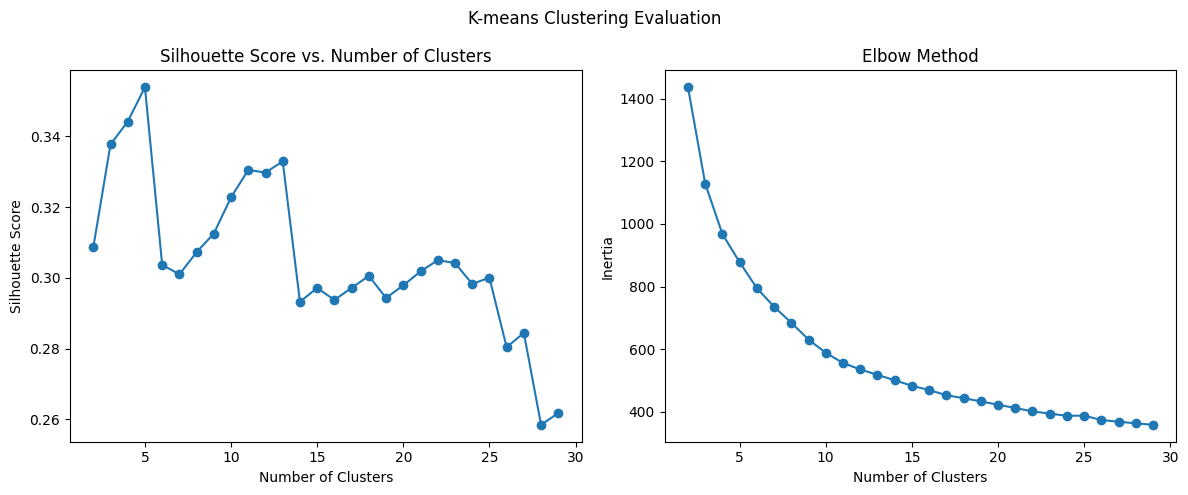

In [158]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_train)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_train, kmeans.labels_)
    silhouette_scores.append(score)

print("Inertia values:", inertia)
print("Silhouette scores:", silhouette_scores)



fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('K-means Clustering Evaluation')

# Silhouette Score plot
axes[0].plot(range(2, 30), silhouette_scores, marker='o')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score vs. Number of Clusters')

# Elbow Method plot
axes[1].plot(range(2, 30), inertia, marker='o')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Inertia')
axes[1].set_title('Elbow Method')

plt.tight_layout()
plt.show()

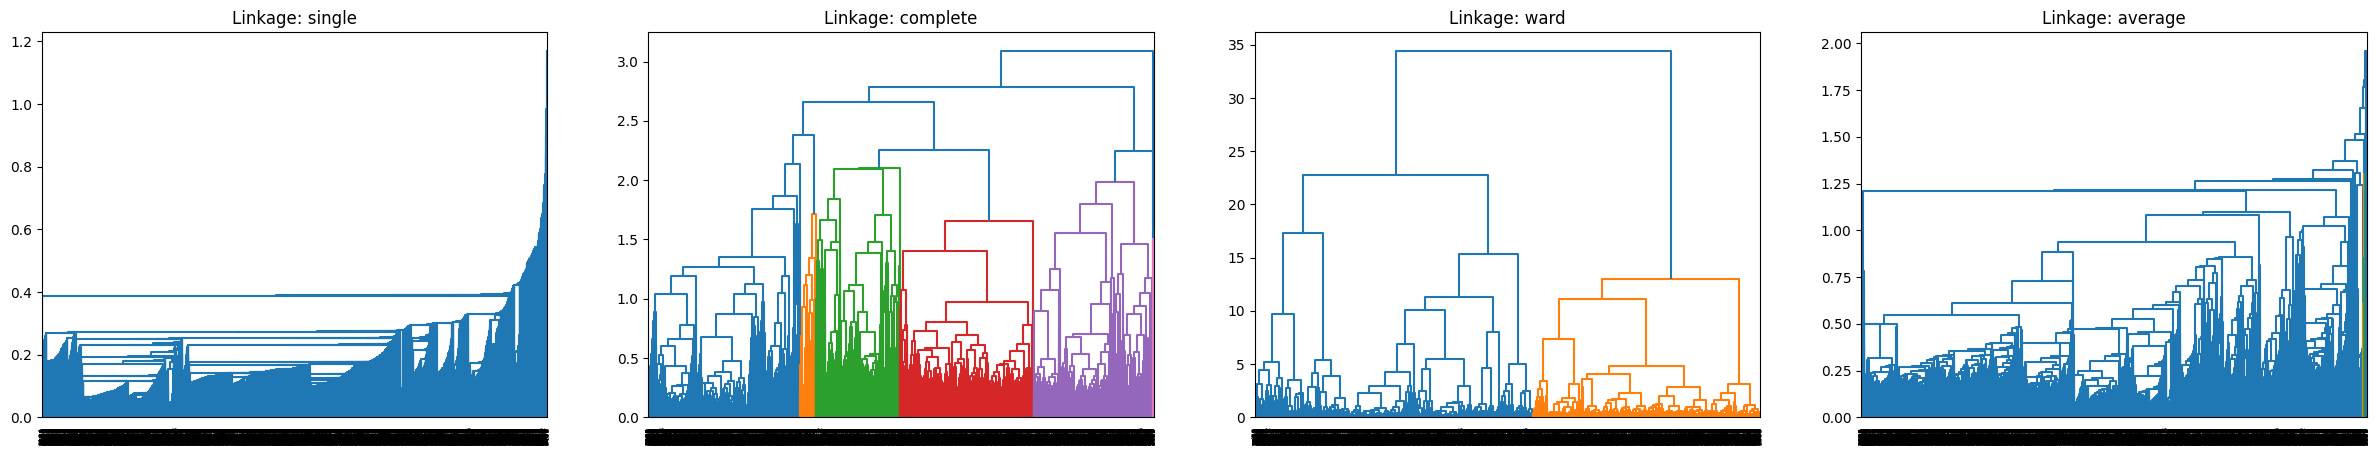

In [169]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

data = df_train.values

methods = ['single', 'complete', 'ward', 'average']
linked_method = []

fig, axes = plt.subplots(1, 4, figsize=(30, 5))
for i, method in enumerate(methods):
    linked_clusters = linkage(data, method)
    linked_method.append(linked_clusters)
    dendrogram(linked_clusters,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True,
               ax=axes[i])
    axes[i].set_title(f'Linkage: {method}')
plt.show()





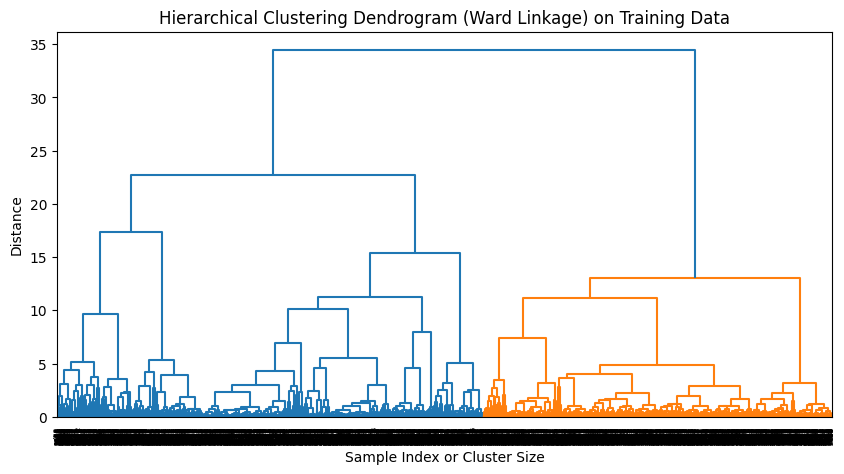

In [171]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Use X_train for hierarchical clustering
data = df_train.values

# Perform hierarchical clustering with 'ward' linkage
linked_clusters_ward = linkage(data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked_clusters_ward,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage) on Training Data')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

[[2.88500000e+03 3.47500000e+03 1.02030472e-02 2.00000000e+00]
 [3.01100000e+03 3.42600000e+03 1.06230946e-02 2.00000000e+00]
 [1.41400000e+03 4.15600000e+03 1.23483196e-02 3.00000000e+00]
 ...
 [8.29700000e+03 8.30200000e+03 1.73269370e+01 7.79000000e+02]
 [8.30700000e+03 8.30800000e+03 2.27374959e+01 2.28800000e+03]
 [8.30600000e+03 8.30900000e+03 3.44492355e+01 4.15600000e+03]]
